In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
print(pd.__version__ , sns.__version__,np.__version__)

1.4.4 0.12.0 1.23.2


In [3]:
train_df=pd.read_csv("titan/train.csv")
test_df=pd.read_csv("titan/test.csv")
print(train_df.shape,test_df.shape)

(891, 12) (418, 11)


In [4]:
train_df.sample(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
810,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


### 칼럼(피쳐스, features) 
- Survial 생존여부  0 = false, 1=true
- Pclass 티켓 클래스 1=1st, 2=2nd , 3=3rd
- Sex 성별
- Age 나이
- SibSp 형제,자매,배우자가 배에 탄 수
- Parch 부모,자식(직계가족)
- Ticket 티켓 번호
- Fare 지불금액
- Cabin  객식 번호
- Embarked 승선항 C=Cherbourg, Q= Queenstown, S=Southampton

### 범주형
- 명목형 : Survived, Sex, Embarked
- 순서형 : Pclass

### 숫자형
- 연속형 : Age, Fare, 
- 이산형 : SibSp, Parch

### 혼합 데이터 유형
- Ticket
- Cabin

### 오류 또는 오타 있을 수 있는 데이터
- Name

### 빈값
- Cabin>Age>Embarked

### object
- Name, Sex, Ticket, Vabin, Embarked
- 숫자형 7개

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 수치값의 분포
- 실제 탑승인원(2,224)의 40% (891) 만 train 데이터에 저장
- 35% 정도 생존, 실제는 38%생존
- 대부분의 승객(75%)은 부모나 자녀와 함께 여행하지 않았다.
 - 승객의 30%가까이 형제,자매,배우자와 한명과 함께 탑승
 - 요금은 다양
 - 20~80대의 다양한 연령층 탑승

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 범주형 컬럼의 분포
- 동명이인 존재 하지않음(이름이 다다름)
- 남성 577명약(65%)
- 객실은 중복이 되고 여러명이 한 객실을 공유
- 세가지 항구에서 승객이 탑승, 대부분 S항에서 승선
- 티켓은 중복된 값이 22%로 높다.

In [7]:
train_df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 데이터 분석을 기반으로 가정
#### 상관
 상관 관계 찾기
 
#### 완료(데이터 완성)
 1. Age는 상관관계가 높아 결측치를 처리해서 완성
 2. Embarked 결측치를 처리해서 완성

#### 수정
 1. Ticket 제외 될 수 있다.(중복값이 많아서)
 2. Cabin 삭제 될 수 있음 (결측치가 너무 많아서)
 3. PId - 의미가 퇴색(모두가 독립적 내용), 구분용(기본키) 값으로만 의미있음
 4. Name - 제외 될 수있음(PId와 유사)
 
#### 생성
 1. Parch,SipSp 합하면 총 가족수로 변환
 2. Name 칼럼에서 Title 새 칼럼으로 추출이 될 수 있다.
 3. 나이 범위를 새롭게 칼럼으로 만들 수 있다.
 4. 학습에 도움이 될 경우 요금 범주형으로 만들 수 있다.
 
#### 분류
 1. 여성이 생존했을 가능성이 높다.
 2. 어린이가 생존했을 가능성이 높다.
 3. 상류층 승객이 더 생존했을 가능성이 높다.

### 피벗 피쳐로 분석
 상관 관계를 신속하게 분석, 빈 값이 없는 피쳐(칼럼)에 대해서 작업, 명목형(Sex).순서형(Pclass).이산형(SibSp, Parch)으로분석
 - **Pclass** : 생존과 유의미한 상관관계가 있다.. 피쳐를 우리 모델에 포함
 - **Sex** : 여성의 생존율이 74%이상
 - **SibSp,Parch** : 상관관계가 높지않다. 가족수라는 새로운 칼럼으로 도출할 필요성이 있다.

In [8]:
train_df[["Pclass","Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [9]:
train_df[["Sex","Survived"]].groupby(["Sex"]).mean().sort_values(by="Survived",ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
train_df[["SibSp","Survived"]].groupby(["SibSp"]).mean().sort_values(by="Survived",ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [11]:
train_df[["Parch","Survived"]].groupby(["Parch"]).mean().sort_values(by="Survived",ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


## 데이터를 시각화 하여 분석
### 수치 특성의 상관 관계 분석
수치 특성과 Survived  사이의 상관 관계 이해 :  히스토그램 y(col)-Survived, X(row) - 수치특성

##### **관찰**
- 유아(나이<5) 생존율이 높다.
- 80세 승객은 생존
- 15~25세가 가장 많이 사망했다.
- 대부분의 승객은 15~35세 사이다.

##### **결정사항**
- 모델 훈련에서 나이를 고려해 볼 수 있다.
- Null 값을 처리해서 나이를 완성시킬 필요가 있다.
- 나이 범위 그룸으로 만들어야한다.

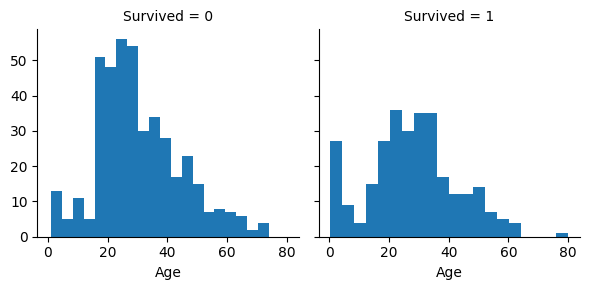

In [12]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist, "Age",bins=20)

### 상관관계 확인 : 명목형과 순서형의 피쳐들
Pclass 시각화

**관찰**
- Pclass = 3 대부분의 승객, 대부분 살아남지 못함
- Pc=3,Pc=2,Pc=1의 유아 승객은 생존비율이 높다.
- Pc=1의 승객 대부분은 생존
- Pclass는 승객 연령 분포가 다양하다.

**결정사항**
- 모델 학습을 위해 Pclass는 고려되어야한다.

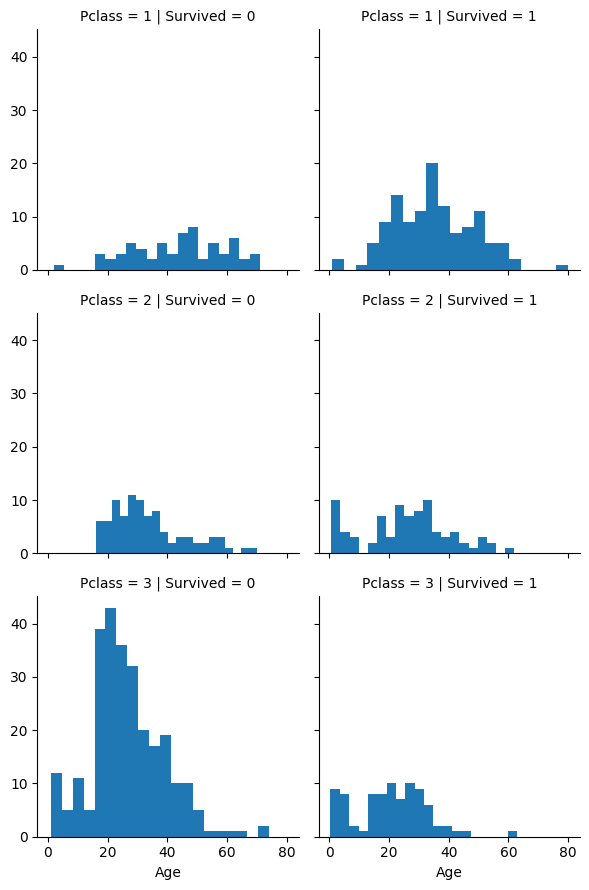

In [13]:
g=sns.FacetGrid(train_df,col="Survived", row="Pclass")
g.map(plt.hist, "Age",bins=20)

## 범주형 피쳐 상관관계
승선항, 성별, 좌석등급에 대해 시각화

**관찰**
- 여성 승객이 남성 승객보다 생존율이 높다.
- C 승선항은 남성이 더 생존함, Pclass와 Embarked의 상관관계 유추
 
**결정사항**
- 모델학습에 성별 피쳐를 추가
- 모델 학습에서 승선항도 완성을 시켜 추가

C:\Users\KB\miniconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\KB\miniconda3\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


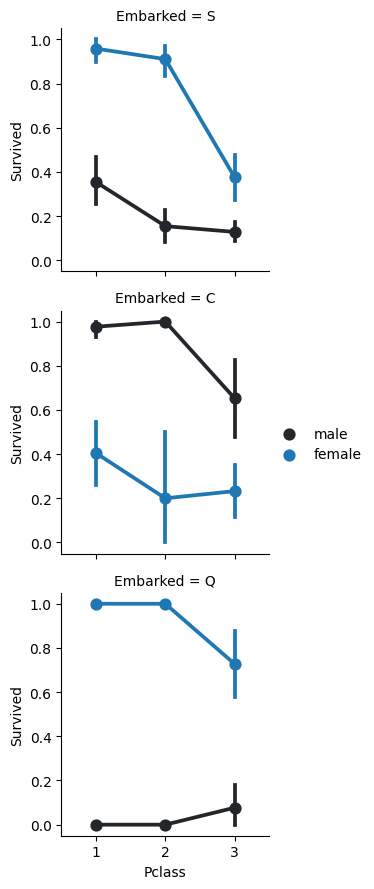

In [14]:
g=sns.FacetGrid(train_df,row="Embarked")
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()

### 범주형 및 숫자형 피쳐의 상관 관계
승선항, 성별, 요금, 생존

**관찰**
- 요금을 더 많이 낸 승객이 많이 생존했다.
- 승선 항구도 생존율과 상관 관계가 있다.

**결정사항**
- 요금 범위를 만들어서 피쳐로 활용해 볼 수 있다.
- 승선 항구도 피쳐로 활용

C:\Users\KB\miniconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


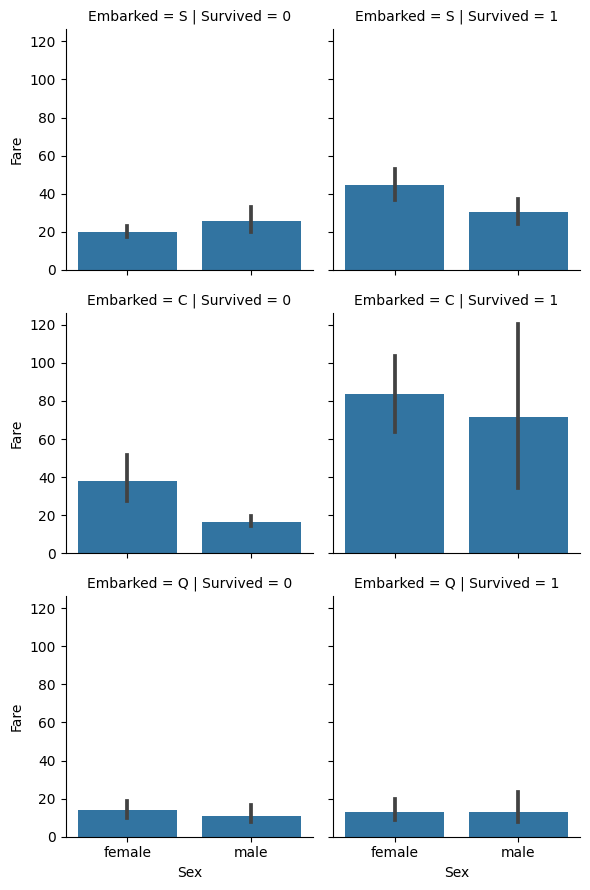

In [15]:
g=sns.FacetGrid(train_df,row="Embarked",col="Survived")
g.map(sns.barplot,"Sex","Fare")

- 몇가지 가정과 결정을 수집
- 결정한 것을 수정, 생성 및 완료 진행

### 피쳐를 삭제
과대 적함 - 상관관계가 없는 칼럼이나 표준편차에 벗어 나는 값들이 너무 많이 존재하는 상태

객실과, 티켓 피쳐 삭제

In [16]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S


In [17]:
print("Before",train_df.shape, test_df.shape)

##pop,drop ->axis = 1(열) , 0 (행) (를 꼭 넣아야함)

train_df = train_df.drop(["Cabin","Ticket"],axis=1) 
test_df = test_df.drop(["Cabin","Ticket"],axis=1)

combine=[train_df,test_df]

print("After",train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


### 기존 피쳐에서 추출하여 새 피쳐 작성
1. Name 피쳐(칼럼)에서 타이틀을 추출
2. PId는 삭제


In [18]:
for dataset in combine:
    print(dataset.shape)

(891, 10)
(418, 9)


In [19]:
for dataset in combine:
    dataset["Title"]=dataset.Name.str.extract(" ([A-Za-z]+)\.",expand=False)

pd.crosstab(train_df["Title"],train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
# 일반적인 타이틀로 수정
# 너무 적은 타이틀은 "희귀한"으로 수정

for dataset in combine:
    dataset["Title"]=dataset["Title"].replace(["Lady","Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer"],"Rare")
    dataset["Title"]=dataset["Title"].replace("Mile","Miss")
    dataset["Title"]=dataset["Title"].replace("Ms","Miss")
    dataset["Title"]=dataset["Title"].replace("Mme","Mr")
    
train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.699454
2,Mlle,1.000000
3,Mr,0.158301
4,Mrs,0.792000
5,Rare,0.347826


In [21]:
#범주형 문자열 타이틀을 순서형 숫자로 변환

title_mapping={"Mr":1,"Miss":2,"Master":4, "Rare":5}
for dataset in combine:
    dataset["Title"]=dataset["Title"].map(title_mapping)
    dataset["Title"]=dataset["Title"].fillna(0)
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
784,785,0,3,"Ali, Mr. William",male,25.00,0,0,7.05,S,1.0
492,493,0,1,"Molson, Mr. Harry Markland",male,55.00,0,0,30.50,S,1.0
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,18.75,S,4.0
735,736,0,3,"Williams, Mr. Leslie",male,28.50,0,0,16.10,S,1.0
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,27.90,S,2.0


In [22]:
# 이름 피쳐 삭제 
# 승객아이디 삭제
train_df=train_df.drop(["Name","PassengerId"],axis=1)
test_df=test_df.drop(["Name"],axis=1)
combine=[train_df,test_df]
train_df.shape, test_df.shape
#Run -> Run All Cells(전체 다시 실행)

((891, 9), (418, 9))

In [23]:
train_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
713,0,3,male,29.0,0,0,9.4833,S,1.0
52,1,1,female,49.0,1,0,76.7292,C,0.0
319,1,1,female,40.0,1,1,134.5000,C,0.0
580,1,2,female,25.0,1,1,30.0000,S,2.0
31,1,1,female,NaN,1,0,146.5208,C,0.0
261,1,3,male,3.0,4,2,31.3875,S,4.0
407,1,2,male,3.0,1,1,18.7500,S,4.0
849,1,1,female,NaN,1,0,89.1042,C,0.0
414,1,3,male,44.0,0,0,7.9250,S,1.0
359,1,3,female,NaN,0,0,7.8792,Q,2.0


### 범주형 문자 피쳐 변환
문자열을 포함하는 피쳐를 숫자로 변환
성별 여성1 남성0 로 변환 

In [24]:
for dataset in combine:
    dataset["Sex"]=dataset["Sex"].map({"female":1,"male":0}).astype(int)
train_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
775,0,3,0,18.0,0,0,7.7500,S,1.0
314,0,2,0,43.0,1,1,26.2500,S,1.0
99,0,2,0,34.0,1,0,26.0000,S,1.0
492,0,1,0,55.0,0,0,30.5000,S,1.0
692,1,3,0,NaN,0,0,56.4958,S,1.0


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    float64
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 59.3+ KB


### 결측값 처리해서 완료하기
1. 너무 적을 때는 삭제(결측치가 많을때)
2. 평균이나 최빈도수로 삽입
3. 평균과 표준편차 사이의 난수를 생성
4. 다른 피쳐들과의 상관관계를 찾아서 삽입
5. 위의 방법들을 조합하여 사용

In [26]:
#결측치 확인
for dataset in combine:
    print(dataset.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64


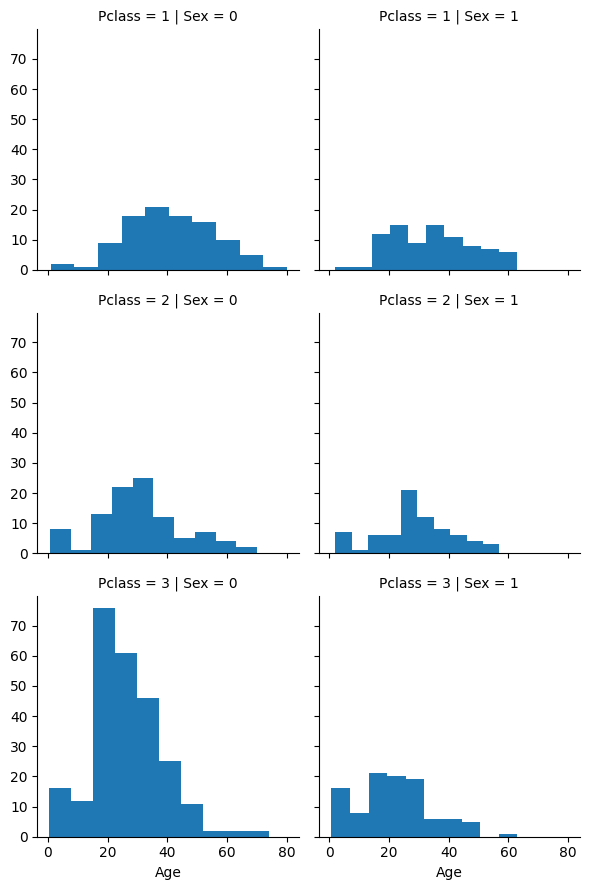

In [27]:
# 나이 Pclass X Gender
g=sns.FacetGrid(train_df, row="Pclass",col="Sex")
g.map(plt.hist,"Age")

In [28]:
#Pclass, Gender 3*2 리스트
# 1-0 or 1
#[[0,0,0],[0,0,0]]
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [29]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset["Sex"]==i)& (dataset["Pclass"]==j+1)]["Age"].dropna()
            age_guess=guess_df.mean()
            guess_ages[i,j]=age_guess
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())& (dataset.Sex==i)&(dataset.Pclass==j+1),"Age"]=guess_ages[i,j]
    dataset["Age"]=dataset["Age"].astype(int)

In [30]:
guess_ages

array([[40.52      , 30.94067797, 24.52510417],
       [41.33333333, 24.37655172, 23.0734    ]])

In [31]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [32]:
#age 를 범위 밴드형으로 만들고 생존상관 관계를 확인
# 0~5, 6~10세
#cut 데이터를 동일한 길이로 나눠줌

train_df["AgeBand"]=pd.cut(train_df["Age"],16)
train_df[["AgeBand","Survived"]].groupby(["AgeBand"],as_index=False).mean().sort_values(by="AgeBand")

,AgeBand,Survived
0,"(-0.08, 5.0]",0.704545
1,"(5.0, 10.0]",0.350000
2,"(10.0, 15.0]",0.578947
3,"(15.0, 20.0]",0.340206
4,"(20.0, 25.0]",0.411043
5,"(25.0, 30.0]",0.255814
6,"(30.0, 35.0]",0.526316
7,"(35.0, 40.0]",0.405797
8,"(40.0, 45.0]",0.323529
9,"(45.0, 50.0]",0.432432


In [33]:

train_df["AgeBand"]=pd.cut(train_df["Age"],5)
train_df["First"]=pd.cut(train_df["Pclass"],16)
train_df[["AgeBand","First","Survived"]].groupby(["AgeBand"],as_index=False).mean().sort_values(by="AgeBand")

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [34]:
train_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,First
54,0,1,0,65,0,1,61.9792,C,1.0,"(64.0, 80.0]","(0.998, 1.125]"
304,0,3,0,26,0,0,8.0500,S,1.0,"(16.0, 32.0]","(2.875, 3.0]"
328,1,3,1,31,1,1,20.5250,S,0.0,"(16.0, 32.0]","(2.875, 3.0]"
46,0,3,0,26,1,0,15.5000,Q,1.0,"(16.0, 32.0]","(2.875, 3.0]"
231,0,3,0,29,0,0,7.7750,S,1.0,"(16.0, 32.0]","(2.875, 3.0]"
273,0,1,0,37,0,1,29.7000,C,1.0,"(32.0, 48.0]","(0.998, 1.125]"
98,1,2,1,34,0,1,23.0000,S,0.0,"(32.0, 48.0]","(1.875, 2.0]"
82,1,3,1,21,0,0,7.7875,Q,2.0,"(16.0, 32.0]","(2.875, 3.0]"
92,0,1,0,46,1,0,61.1750,S,1.0,"(32.0, 48.0]","(0.998, 1.125]"
835,1,1,1,39,1,1,83.1583,C,2.0,"(32.0, 48.0]","(0.998, 1.125]"


In [35]:
# AgeBand 를 서수로 대체
for dataset in combine:
    dataset.loc[dataset["Age"]<=16,"Age"]=0
    dataset.loc[(dataset["Age"]>16)&(dataset["Age"]<=32),"Age"]=1
    dataset.loc[(dataset["Age"]>32)&(dataset["Age"]<=48),"Age"]=2
    dataset.loc[(dataset["Age"]>48)&(dataset["Age"]<=64),"Age"]=3
    dataset.loc[dataset["Age"]>64,"Age"]=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,First
0,0,3,0,1,1,0,7.2500,S,1.0,"(16.0, 32.0]","(2.875, 3.0]"
1,1,1,1,2,1,0,71.2833,C,0.0,"(32.0, 48.0]","(0.998, 1.125]"
2,1,3,1,1,0,0,7.9250,S,2.0,"(16.0, 32.0]","(2.875, 3.0]"
3,1,1,1,2,1,0,53.1000,S,0.0,"(32.0, 48.0]","(0.998, 1.125]"
4,0,3,0,2,0,0,8.0500,S,1.0,"(32.0, 48.0]","(2.875, 3.0]"


In [36]:
#AgeBand는 삭제
train_df=train_df.drop(["AgeBand"],axis=1)
combine=[train_df,test_df]
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,First
886,0,2,0,1,0,0,13.00,S,5.0,"(1.875, 2.0]"
887,1,1,1,1,0,0,30.00,S,2.0,"(0.998, 1.125]"
888,0,3,1,1,1,2,23.45,S,2.0,"(2.875, 3.0]"
889,1,1,0,1,0,0,30.00,C,1.0,"(0.998, 1.125]"
890,0,3,0,1,0,0,7.75,Q,1.0,"(2.875, 3.0]"


### 기존 피쳐를 결합한 새 피쳐 작성
Parch와 Sibsp를 결합한 FamillySizw라는 새로운 피쳐를 생성
이를 통해서 기존 피쳐는 삭제 사능

In [37]:
for dataset in combine:
    dataset["FamillySize"]=dataset["Parch"]+dataset["SibSp"]+1
train_df[["FamillySize","Survived"]].groupby(["FamillySize"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,FamillySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [38]:
# 가족과 함께 탑승, 홀로 탑승
# IsAlone이라는 피쳐를 생성
for dataset in combine:
    dataset["IsAlone"]=0
    dataset.loc[dataset["FamillySize"]>1,"IsAlone"]=1
train_df[["IsAlone","Survived"]].groupby(["IsAlone"]).mean()

,Survived
IsAlone,
0,0.303538
1,0.505650


In [39]:
#Parch, SibSp, FamillySize 삭제
train_df=train_df.drop(["Parch","SibSp","FamillySize"],axis=1)
test_df=test_df.drop(["Parch","SibSp","FamillySize"],axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,First,IsAlone
0,0,3,0,1,7.2500,S,1.0,"(2.875, 3.0]",1
1,1,1,1,2,71.2833,C,0.0,"(0.998, 1.125]",1
2,1,3,1,1,7.9250,S,2.0,"(2.875, 3.0]",0
3,1,1,1,2,53.1000,S,0.0,"(0.998, 1.125]",1
4,0,3,0,2,8.0500,S,1.0,"(2.875, 3.0]",0


In [40]:
# Pclass*Age 새로운 피쳐를 생성
for dataset in combine:
    dataset["Age*Class"]=dataset["Age"]*dataset["Pclass"]
train_df[["Age*Class","Age","Pclass"]].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


## 범주형 피쳐 완성
승선형 결측치 처리
- 가장 흔한 값으로 채운다

In [41]:
#최빈값 mode()
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [42]:
for dataset in combine:
    dataset["Embarked"]=dataset["Embarked"].fillna(freq_port)
train_df[["Embarked","Survived"]].groupby(["Embarked"]).mean().sort_values(by="Survived",ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


### 변환 : 카테고리형 피쳐를 숫자형으로
승선항을 숫자형으로 변환

In [43]:
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    int32   
 3   Age        891 non-null    int32   
 4   Fare       891 non-null    float64 
 5   Embarked   891 non-null    object  
 6   Title      891 non-null    float64 
 7   First      891 non-null    category
 8   IsAlone    891 non-null    int64   
 9   Age*Class  891 non-null    int64   
dtypes: category(1), float64(2), int32(2), int64(4), object(1)
memory usage: 57.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3 

(None, None)

In [44]:
for dataset in combine:
    dataset["Embarked"]=dataset["Embarked"].map({"S":0,"Q":1,"C":2}).astype(int)
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,First,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1.0,"(2.875, 3.0]",1,3
1,1,1,1,2,71.2833,2,0.0,"(0.998, 1.125]",1,2
2,1,3,1,1,7.9250,0,2.0,"(2.875, 3.0]",0,3
3,1,1,1,2,53.1000,0,0.0,"(0.998, 1.125]",1,2
4,0,3,0,2,8.0500,0,1.0,"(2.875, 3.0]",0,6
5,0,3,0,1,8.4583,1,1.0,"(2.875, 3.0]",0,3
6,0,1,0,3,51.8625,0,1.0,"(0.998, 1.125]",0,3
7,0,3,0,0,21.0750,0,4.0,"(2.875, 3.0]",1,0
8,1,3,1,1,11.1333,0,0.0,"(2.875, 3.0]",1,3
9,1,2,1,0,30.0708,2,0.0,"(1.875, 2.0]",1,0


In [45]:
# 요금에서 결측치
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [46]:
# 요금의 표준편차 중앙값 삽입
test_df["Fare"].fillna(test_df["Fare"].dropna().median(),inplace=True)
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [47]:
# FareBand 피쳐 생성
# cut - 길이를 기준으로 등분
# qcut - 양을 기준으로 등분
train_df["FareBand"]=pd.qcut(train_df["Fare"],4)
train_df[["FareBand","Survived"]].groupby(["FareBand"]).mean().sort_values(by="FareBand",ascending=True)

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [48]:
# 요금 밴드를 기준으로 요금 피쳐를 서수값으로 대체
for dataset in combine:
    dataset.loc[dataset["Fare"]<=7.91,"Fare"]=0
    dataset.loc[(dataset["Fare"]>7.91)&(dataset["Fare"]<=14.454),"Fare"]=1
    dataset.loc[(dataset["Fare"]>14.454)&(dataset["Fare"]<=31.0),"Fare"]=2
    dataset.loc[dataset["Fare"]>31.0,"Fare"]=3
train_df=train_df.drop(["FareBand"],axis=1)
combine=[train_df,test_df]

train_df.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,First,IsAlone,Age*Class
411,0,3,0,1,0.0,1,1.0,"(2.875, 3.0]",0,3
457,1,1,1,2,3.0,0,0.0,"(0.998, 1.125]",1,2
735,0,3,0,1,2.0,0,1.0,"(2.875, 3.0]",0,3
548,0,3,0,2,2.0,0,1.0,"(2.875, 3.0]",1,6
11,1,1,1,3,2.0,0,2.0,"(0.998, 1.125]",0,3
355,0,3,0,1,1.0,0,1.0,"(2.875, 3.0]",0,3
335,0,3,0,1,0.0,0,1.0,"(2.875, 3.0]",0,3
222,0,3,0,3,1.0,0,1.0,"(2.875, 3.0]",0,9
753,0,3,0,1,0.0,0,1.0,"(2.875, 3.0]",0,3
409,0,3,1,1,2.0,0,2.0,"(2.875, 3.0]",1,3


### 모델링, 예측 및 결과
- 텐서플로(구글), 파이토치(페북) : 딥러닝 프레임워크
- 케라스:텐서플로우 2.0의 고성능 API
- 사이킷런: 머신러닝용 프레임워크

In [68]:
train_df=train_df.drop("First",axis=1)

In [69]:
X_train=train_df.drop("Survived",axis=1)
Y_train=train_df["Survived"]
X_test=test_df.drop("PassengerId",axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [97]:
# 로지스틱 레그레이션
# 대표 사용 모델 : 렐루, 시그모이드
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_logreg=round(logreg.score(X_train,Y_train)*100,2)

In [74]:
#서포트 백터 머신
# 분류 알고리즘
#이진 데이터를 분류할 떄 가장 좋은 성능
from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc

82.27

In [75]:
# k-NN 분류와 회귀
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

83.39

In [77]:
# 나이브 베이지안
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

74.64

In [78]:
#퍼셉트론
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred=perceptron.predict(X_test)
acc_perceptron=round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

76.88

In [82]:
# LinearSVC
linear_svc=LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred=linear_svc.predict(X_test)
linear_svc=round(linear_svc.score(X_train,Y_train)*100,2)
linear_svc

C:\Users\KB\miniconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


78.9

In [85]:
# 확률적 경사 하강법(Stochastic Gradient Descent)
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred=sgd.predict(X_test)
acc_sgd=round(sgd.score(X_train,Y_train)*100,2)
acc_sgd

77.67

In [87]:
# 결정트리(Decision Tree)
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(X_test)
acc_decision_tree=round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

86.64

In [90]:
# 랜덤 포레스트(Random Forest)
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)
acc_random_forest=round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

86.64

In [98]:
# 모델에 대한 평가 순위를 매겨서 도출
models=pd.DataFrame({"Model":["SVM","KNN","Logistic Regression","Random Forest","Naive Bayes","Perseptron","SGD","L-SVX","Decision Tree"],
                    "Score":[acc_svc,acc_knn,acc_logreg,acc_random_forest,acc_gaussian,acc_perceptron,acc_sgd,linear_svc,acc_decision_tree]
                    })
models.sort_values(by="Score",ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,83.39
0,SVM,82.27
2,Logistic Regression,79.46
7,L-SVX,78.90
6,SGD,77.67
5,Perseptron,76.88
4,Naive Bayes,74.64


### 모델결정
- 결정 트리는 교육 세트에 과적합하는 단점
- 렌덤 포레스트 모델을 사용하기로 함

In [99]:
submission=pd.DataFrame({
    "PassengerId":test_df["PassengerId"],
    "Survived":Y_pred
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [100]:
submission.to_csv("submission.csv",index=False)